# Essential Stats for data science

Meet Sally, a public school administrator. Some schools in her state of Tennessee are performing below average academically. Her superintendent, under pressure from frustrated parents and voters, approached Sally with the task of understanding why these schools are under-performing. Not an easy problem, to be sure.

To improve school performance, Sally needs to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers.

Though Sally is eager to build an impressive explanatory model, she knows the importance of conducting preliminary research to prevent possible pitfalls or blind spots (e.g. cognitive bias'). Thus, she engages in a thorough exploratory analysis, which includes: a lit review, data collection, descriptive and inferential statistics, and data visualization.

# LIT REVIEW

Sally has strong opinions as to why some schools are under-performing, but opinions won't do, nor will a handful of facts; she needs rigorous statistical evidence.

Sally conducts a lit review, which involves reading a variety of credible sources to familiarize herself with the topic. Most importantly, Sally keeps an open mind and embraces a scientific world view to help her resist confirmation bias (seeking solely to confirm one's own world view).

In Sally's lit review, she finds multiple compelling explanations of school performance: curriculae, income, and parental involvement. These sources will help Sally select her model and data, and will guide her interpretation of the results.

# DATA COLLECTION

The data we want isn't always available, but Sally lucks out and finds student performance data based on test scores (school_rating) for every public school in middle Tennessee. The data also includes various demographic, school faculty, and income variables (see readme for more information). Satisfied with this dataset, she writes a web-scraper to retrieve the data.

But data alone can't help Sally; she needs to convert the data into useful information.

# DESCRIPTIVE AND INFERENTIAL STATISTICS

Sally opens her stats textbook and finds that there are two major types of statistics, descriptive and inferential.

Descriptive statistics identify patterns in the data, but they don't allow for making hypotheses about the data.

Within descriptive statistics, there are two measures used to describe the data: central tendency and deviation. Central tendency refers to the central position of the data (mean, median, mode) while the deviation describes how far spread out the data are from the mean. Deviation is most commonly measured with the standard deviation. A small standard deviation indicates the data are close to the mean, while a large standard deviation indicates that the data are more spread out from the mean.

Inferential statistics allow us to make hypotheses (or inferences) about a sample that can be applied to the population. For Sally, this involves developing a hypothesis about her sample of middle Tennessee schools and applying it to her population of all schools in Tennessee.

For now, Sally puts aside inferential statistics and digs into descriptive statistics.

To begin learning about the sample, Sally uses pandas' describe method, as seen below. The column headers in bold text represent the variables Sally will be exploring. Each row header represents a descriptive statistic about the corresponding column.

In [2]:
# Imports for this article
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read in TN middle school dataset from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Essential%20Statistics/middle_tn_schools.csv')

df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


Looking at the output above, Sally's variables can be put into two classes: measurements and indicators.

Measurements are variables that can be quantified. All data in the output above are measurements. Some of these measurements, such as state_percentile_16, avg_score_16 and school_rating, are outcomes; these outcomes cannot be used to explain one another. For example, explaining school_rating as a result of state_percentile_16 (test scores) is circular logic. Therefore we need a second class of variables.

The second class, indicators, are used to explain our outcomes. Sally chooses indicators that describe the student body (for example, reduced_lunch) or school administration (stu_teach_ratio) hoping they will explain school_rating.

Sally sees a pattern in one of the indicators, reduced_lunch. reduced_lunch is a variable measuring the average percentage of students per school enrolled in a federal program that provides lunches for students from lower-income households. In short, reduced_lunch is a good proxy for household income, which Sally remembers from her lit review was correlated with school performance.

Sally isolates reduced_lunch and groups the data by school_rating using pandas' groupbymethod and then uses describe on the re-shaped data (see below).

In [3]:
df[['reduced_lunch', 'school_rating']].groupby(['school_rating']).describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

Below is a discussion of the metrics from the table above and what each result indicates about the relationship between school_rating and reduced_lunch:

count: the number of schools at each rating. Most of the schools in Sally's sample have a 4- or 5-star rating, but 25% of schools have a 1-star rating or below. This confirms that poor school performance isn't merely anecdotal, but a serious problem that deserves attention.

mean: the average percentage of students on reduced_lunch among all schools by each school_rating. As school performance increases, the average number of students on reduced lunch decreases. Schools with a 0-star rating have 83.6% of students on reduced lunch. And on the other end of the spectrum, 5-star schools on average have 21.6% of students on reduced lunch. We'll examine this pattern further. in the graphing section.

std: the standard deviation of the variable. Referring to the school_rating of 0, a standard deviation of 8.813498 indicates that 68.2% (refer to readme) of all observations are within 8.81 percentage points on either side of the average, 83.6%. Note that the standard deviation increases as school_rating increases, indicating that reduced_lunch loses explanatory power as school performance improves. As with the mean, we'll explore this idea further in the graphing section.

min: the minimum value of the variable. This represents the school with the lowest percentage of students on reduced lunch at each school rating. For 0- and 1-star schools, the minimum percentage of students on reduced lunch is 53%. The minimum for 5-star schools is 2%. The minimum value tells a similar story as the mean, but looking at it from the low end of the range of observations.

25%: the bottom quartile; represents the lowest 25% of values for the variable, reduced_lunch. For 0-star schools, 25% of the observations are less than 79.5%. Sally sees the same trend in the bottom quartile as the above metrics: as school_rating increases the bottom 25% of reduced_lunch decreases.

50%: the second quartile; represents the lowest 50% of values. Looking at the trend in school_rating and reduced_lunch, the same relationship is present here.

75%: the top quartile; represents the lowest 75% of values. The trend continues.

max: the maximum value for that variable. You guessed it: the trend continues!

The descriptive statistics consistently reveal that schools with more students on reduced lunch under-perform when compared to their peers. Sally is on to something.

Sally decides to look at reduced_lunch from another angle using a correlation matrix with pandas' corr method. The values in the correlation matrix table will be between -1 and 1 (see below). A value of -1 indicates the strongest possible negative correlation, meaning as one variable decreases the other increases. And a value of 1 indicates the opposite. The result below, -0.815757, indicates strong negative correlation between reduced_lunch and school_rating. There's clearly a relationship between the two variables.

In [9]:
# only view these two variables
df[['reduced_lunch', 'school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


# ESSENTIAL GRAPHS FOR EXPLORING DATA

## Box-and-Whisker Plot

In her stats book, Sally sees a box-and-whisker plot. A box-and-whisker plot is helpful for visualizing the distribution of the data from the mean. Understanding the distribution allows Sally to understand how far spread out her data is from the mean; the larger the spread from the mean, the less robust reduced_lunch is at explaining school_rating.

See below for an explanation of the box-and-whisker plot.

![alt text](box-plot-explained.width-1200.png "Title")

Now that Sally knows how to read the box-and-whisker plot, she graphs reduced_lunch to see the distributions. See below.

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('school_rating')

# boxplot with only these two variables
_ = df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(13,8), vert=False, sym='b.', ax=ax)

In her box-and-whisker plots, Sally sees that the minimum and maximum reduced_lunch values tend to get closer to the mean as school_rating decreases; that is, as school_rating decreases so does the standard deviation in reduced_lunch.

What does this mean?

Starting with the top box-and-whisker plot, as school_rating decreases, reduced_lunch becomes a more powerful way to explain outcomes. This could be because as parents' incomes decrease they have fewer resources to devote to their children's education (such as, after-school programs, tutors, time spent on homework, computer camps, etc) than higher-income parents. Above a 3-star rating, more predictors are needed to explain school_rating due to an increasing spread in reduced_lunch.

Having used box-and-whisker plots to reaffirm her idea that household income and school performance are related, Sally seeks further validation.

SCATTER PLOT


To further examine the relationship between school_rating and reduced_lunch, Sally graphs the two variables on a scatter plot. See below.

C:\Users\maste\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


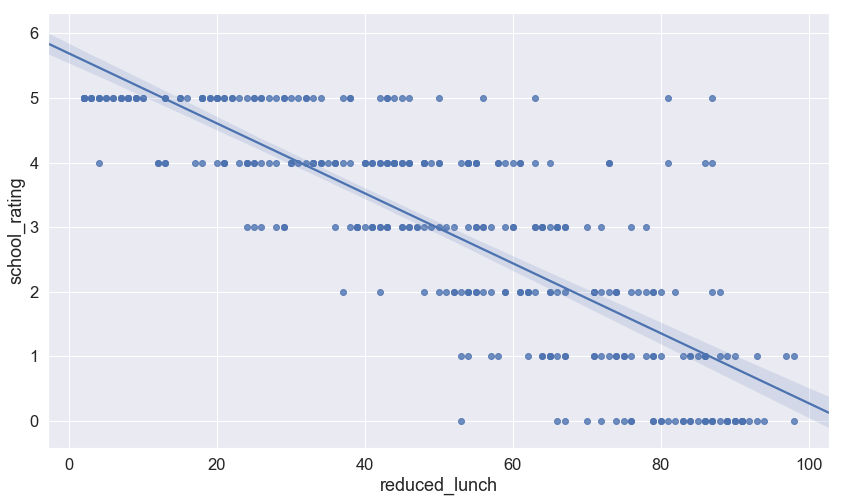

In [11]:
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=df, x='reduced_lunch', y='school_rating')

In the scatter plot above, each dot represents a school. The placement of the dot represents that school's rating (Y-axis) and the percentage of its students on reduced lunch (x-axis).

The downward trend line shows the negative correlation between school_rating and reduced_lunch (as one increases, the other decreases). The slope of the trend line indicates how much school_rating decreases as reduced_lunch increases. A steeper slope would indicate that a small change in reduced_lunch has a big impact on school_rating while a more horizontal slope would indicate that the same small change in reduced_lunch has a smaller impact on school_rating.

Sally notices that the scatter plot further supports what she saw with the box-and-whisker plot: when reduced_lunch increases, school_rating decreases. The tighter spread of the data as school_rating declines indicates the increasing influence of reduced_lunch. Now she has a hypothesis.

# CORRELATION MATRIX

Sally is ready to test her hypothesis: a negative relationship exists between school_rating and reduced_lunch (to be covered in a follow up article). If the test is successful, she'll need to build a more robust model using additional variables. If the test fails, she'll need to re-visit her dataset to choose other variables that possibly explain school_rating. Either way, Sally could benefit from an efficient way of assessing relationships among her variables.

An efficient graph for assessing relationships is the correlation matrix, as seen below; its color-coded cells make it easier to interpret than the tabular correlation matrix above. Red cells indicate positive correlation; blue cells indicate negative correlation; white cells indicate no correlation. The darker the colors, the stronger the correlation (positive or negative) between those two variables.

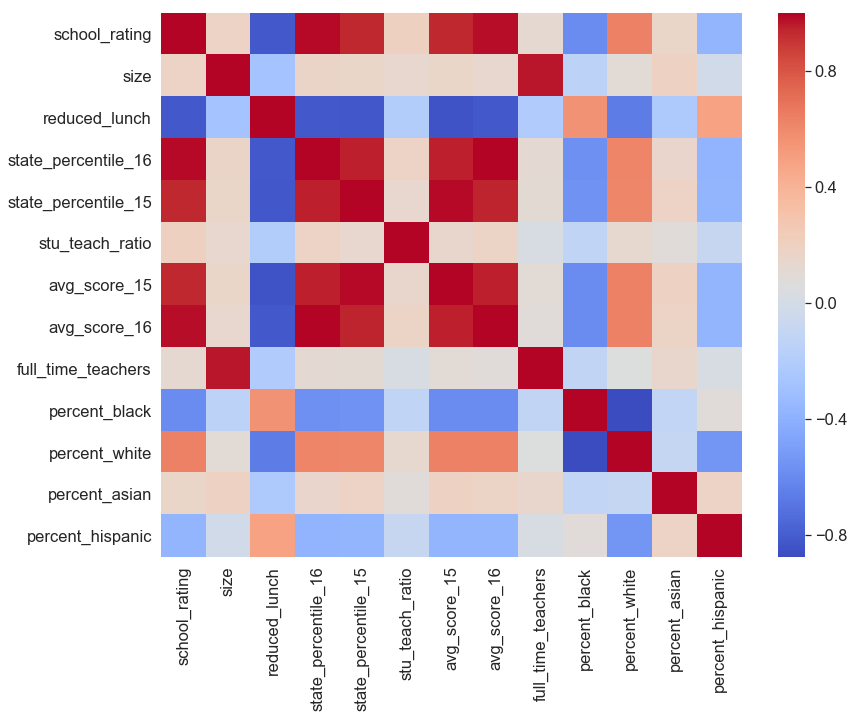

In [10]:
# create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')